# Import Data

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import re

In [7]:

fields = ['ID', 'Description']
df = pd.read_csv('airbnb-listings.csv', encoding = "ISO-8859-1",usecols=fields)
df.head()

,ID,Description
0,17938814,This apartment is flooded with light. It is 2 ...
1,267561,Amazing location and always super clean! Stay ...
2,16301717,My place is close to Clinton St. Baking Compan...
3,834190,"Welcome to downtown, simply the best part of M..."
4,15582736,Perfectly located on the border of the Lower E...


# Data Cleaning

Check data types

In [9]:
df.dtypes

ID              int64
Description    object
dtype: object

In [10]:
#drop NULL 
df=df.dropna() 

In [11]:
for elem in df["Description"]:
    if len(elem)<2:
        print (elem)

n
a
/
n


In [12]:
#drop meaningless descriptions like "n" "a" "/"
#reset index
df=df[df['Description']!='n']
df=df[df['Description']!='a']  
df=df[df['Description']!='/'] 
df.reset_index(drop=True,inplace=True)
df.head()

,ID,Description
0,17938814,This apartment is flooded with light. It is 2 ...
1,267561,Amazing location and always super clean! Stay ...
2,16301717,My place is close to Clinton St. Baking Compan...
3,834190,"Welcome to downtown, simply the best part of M..."
4,15582736,Perfectly located on the border of the Lower E...


In [17]:
def clean(string):
    string = re.sub(r"\d", "", string) # remove numbers  
    string = re.sub(r"_+", "", string) # remove consecutive underscores
    string = re.sub(r"[!@#$:().;,''-?&]","", string) # remove punctuations
    string = string.lower() # tranform to lower case    
    return string.strip()

df["Clean_description"] = df.Description.apply(clean)
df.head()

,ID,Description,Clean_description
0,17938814,This apartment is flooded with light. It is 2 ...,this apartment is flooded with light it is bl...
1,267561,Amazing location and always super clean! Stay ...,amazing location and always super clean stay a...
2,16301717,My place is close to Clinton St. Baking Compan...,my place is close to clinton st baking company...
3,834190,"Welcome to downtown, simply the best part of M...",welcome to downtown simply the best part of ma...
4,15582736,Perfectly located on the border of the Lower E...,perfectly located on the border of the lower e...


# Calculate word frequency for description data

             Frequency
Word                  
apartment        28606
room             19544
bedroom          16394
kitchen          14627
bed              12019
park             11762
restaurants      10215
building         10065
one               9723
located           9590


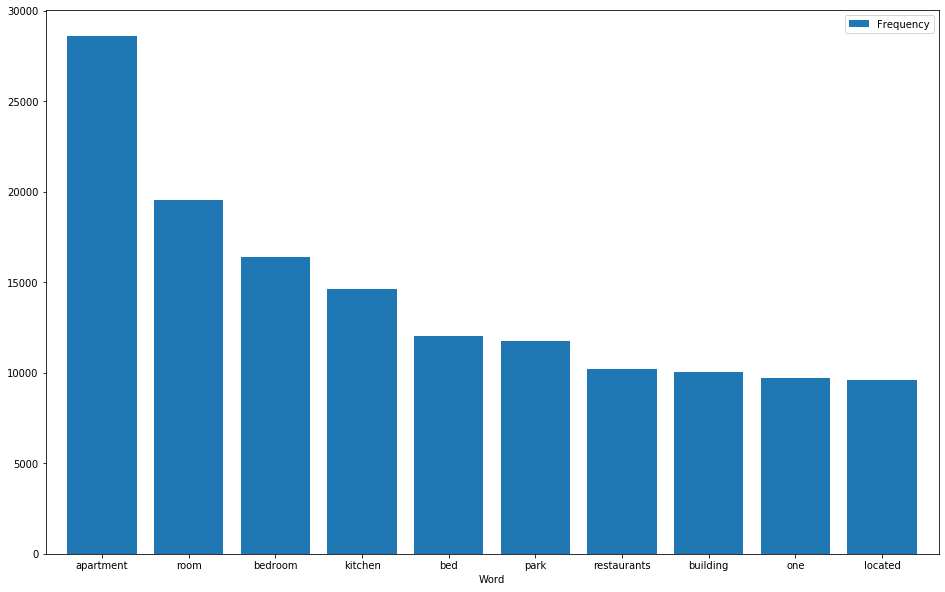

In [18]:
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter
import nltk

top_N=10
stopwords = nltk.corpus.stopwords.words('english')
# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# replace '|'-->' ' and drop all stopwords
words = (df.Clean_description
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)

# plot
rslt.plot.bar(rot=0, figsize=(16,10), width=0.8)


# Create Wordcloud for Description data

In [19]:
!pip install -q wordcloud

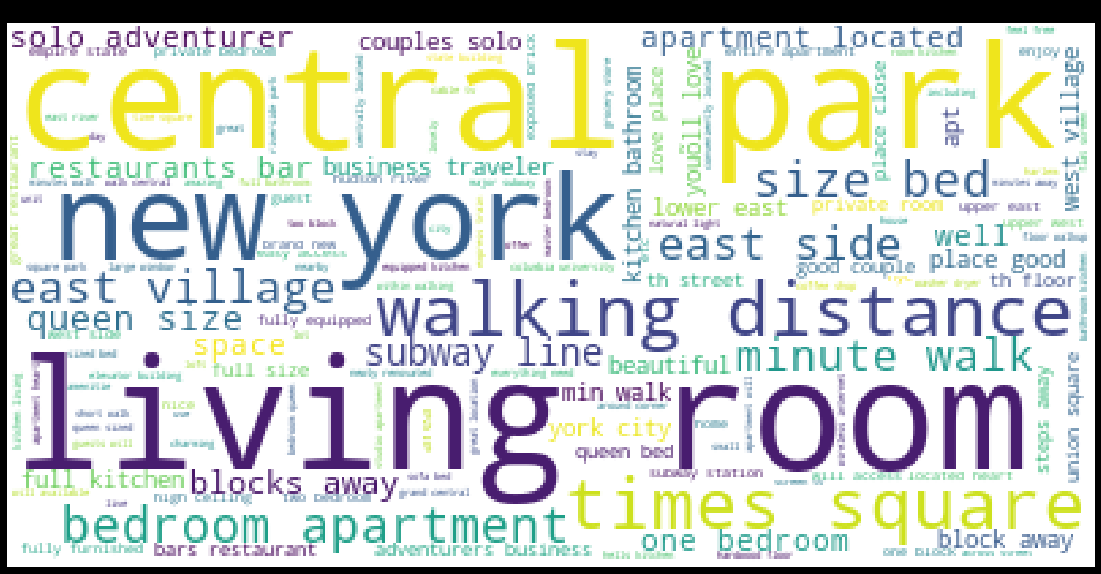

In [21]:
from wordcloud import WordCloud, STOPWORDS
def wordcloud(df,col):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in df[col]]))
    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(" ")
    
    
wordcloud(df,'Clean_description')  